# Práctica M 32

* Simula y visualiza una distribución Poisson con parámetro lambda = 2.5 y una muestra de 1000. Esto significa que, en promedio, ocurren 2.5 terremotos de magnitud mayor a 8.5 en la escala de Richter durante un año. Con esta simulación, modela el número de terremotos que pueden ocurrir por año durante los siguientes 1000 años. Este caso es análogo al ejercicio hecho durante la práctica sobre la distribución binomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

lambda_param_2_5 = 2.5
sample_size = 1000

dist_poiss = np.random.poisson(lambda_param_2_5, sample_size)

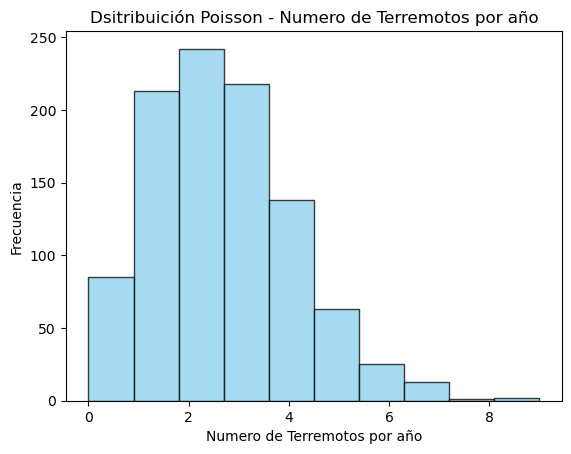

In [10]:
# vizualizacion de histograma

plt.figure()
plt.hist(dist_poiss, bins= 10, alpha = 0.75, color = 'skyblue', edgecolor = 'black')
plt.title('Dsitribuición Poisson - Numero de Terremotos por año')
plt.xlabel('Numero de Terremotos por año')
plt.ylabel('Frecuencia')
plt.show()

* Usa el set de datos marketing_campaign.csv y realiza una prueba de hipótesis para contrastar si el número de compras en línea (NumWebPurchases) tiene alguna relevancia con el número de visitas a la página web (NumWebVisitsMonth). 

In [11]:
import pandas as pd
df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M32 DS/Cientifico de datos M32 marketing_campaign.csv',
                 sep = None, engine = 'python')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
import seaborn as sns

In [21]:
from scipy.stats import ttest_ind

In [28]:
sampled_df = df.sample(n= 100, random_state = 100)

In [29]:
median_visits = sampled_df['NumWebVisitsMonth'].median()
low_visit = sampled_df[sampled_df['NumWebVisitsMonth'] < median_visits]['NumWebPurchases']
high_visit = sampled_df[sampled_df['NumWebVisitsMonth'] >= median_visits]['NumWebPurchases']

In [30]:
t_stat, p_value = ttest_ind(low_visit, high_visit)
print('T-statistics :', t_stat, '\np-values', p_value)

if p_value < 0.05:
     print('Reject Null Hypothesis')
elif p_value >= 0.05:
    print('Fail to reject Null Hypothesis')

T-statistics : 1.28393890417002 
p-values 0.20219062840234683
Fail to reject Null Hypothesis


###  Esto significa que no hay suficiente evidencia estadística para rechazar la hipótesis nula en el contexto de la prueba t que se realizó

* Agrupa la información en dos categorías: clientes con alto número de visitas (> 5) y bajo número de visitas (≤ 5). Realiza una prueba ANOVA para este análisis.

<Axes: xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

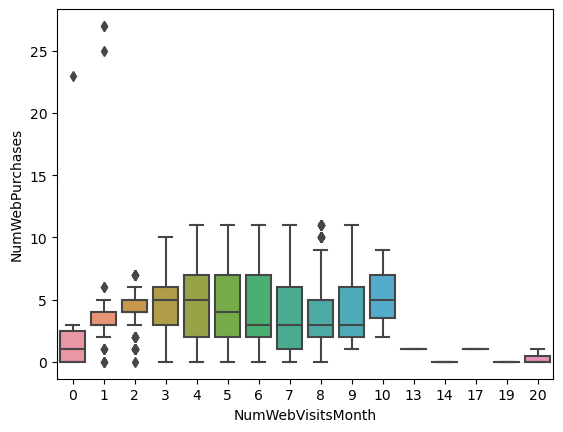

In [20]:
sns.boxplot(y = df['NumWebPurchases'], x = df['NumWebVisitsMonth'])

In [31]:
# agrupamos

client_low_visit = sampled_df[sampled_df['NumWebVisitsMonth'] <= 5]['NumWebPurchases']
client_high_visit = sampled_df[sampled_df['NumWebVisitsMonth'] > 5]['NumWebPurchases']

In [37]:
# prueba estadistica

from scipy.stats import f_oneway
f_stat, p_value= f_oneway(client_low_visit, client_high_visit)
print('T-statistics: ', f_stat, '\np.value', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
elif p_value >= 0.05:
    print('Fail to reject Null Hypothesis')

T-statistics:  1.6484991096413124 
p.value 0.2021906284023462
Fail to reject Null Hypothesis
